In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('German bank.csv')
#here we load the file as a databse

In [7]:
df
#here we take a look at the database 

Status of existing checking account  Duration in month  Credit history    \
0                                      1                6.0                 4   
1                                      2               48.0                 2   
2                                      4               12.0                 4   
3                                      1               42.0                 2   
4                                      1               24.0                 3   
..                                   ...                ...               ...   
995                                    4               12.0                 2   
996                                    1               30.0                 2   
997                                    4               12.0                 2   
998                                    1               45.0                 2   
999                                    2               45.0                 4   

     Purpose  Credit amount   Savings account/bonds  Present employment since  \
0        4.0          1169.0                      5                       5.0   
1        4.0          5951.0                      1                       3.0   
2        7.0          2096.0                      1                       4.0   
3        3.0          7882.0                      1                       4.0   
4        1.0          4870.0                      1                       3.0   
..       ...             ...                    ...                       ...   
995      3.0          1736.0                      1                       4.0   
996      2.0          3857.0                      1                       3.0   
997      4.0           804.0                      1                       5.0   
998      4.0          1845.0                      1                       3.0   
999      2.0          4576.0                      2                       1.0   

    Installment rate in percentage of disposable income  \
0                                                    4    
1                                                    2    
2                                                    2    
3                                                    2    
4                                                    3    
..                                                 ...    
995                                                  3    
996                                                  4    
997                                                  4    
998                                                  4    
999                                                  3    

     Personal status and gender   Other debtors / guarantors   ...  Property   \
0                              3                          1.0  ...        1.0   
1                              2                          1.0  ...        1.0   
2                              3                          1.0  ...        1.0   
3                              3                          3.0  ...        2.0   
4                              3                          1.0  ...        4.0   
..                           ...                          ...  ...        ...   
995                            2                          1.0  ...        1.0   
996                            1                          1.0  ...        2.0   
997                            3                          1.0  ...        3.0   
998                            3                          1.0  ...        4.0   
999                            3                          1.0  ...        3.0   

     Age in years   Other installment plans   Housing  \
0             67.0                       4.0      2.0   
1             22.0                       4.0      2.0   
2             49.0                       4.0      2.0   
3             45.0                       4.0      3.0   
4             53.0                       4.0      3.0   
..             ...                 

In [8]:
df.info()
#we see the non-null values of each column and also their type of data, the number of columns and the name of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       1000 non-null   int64  
 1   Duration in month                                         997 non-null    float64
 2   Credit history                                            1000 non-null   int64  
 3   Purpose                                                   995 non-null    float64
 4   Credit amount                                             977 non-null    float64
 5   Savings account/bonds                                     1000 non-null   int64  
 6   Present employment since                                  983 non-null    float64
 7   Installment rate in percentage of disposable income       978 non-null    object 
 8   Personal status and

In [9]:
df.isnull().sum()
#by this line we can see the total number of null values in each column

Status of existing checking account                          0
Duration in month                                            3
Credit history                                               0
Purpose                                                      5
Credit amount                                               23
Savings account/bonds                                        0
Present employment since                                    17
Installment rate in percentage of disposable income         22
Personal status and gender                                   0
Other debtors / guarantors                                   9
Present residence since                                      0
Property                                                    19
Age in years                                                 5
Other installment plans                                      3
Housing                                                      9
Number of existing credits at this bank                

In [10]:
df['Number of people being liable to provide maintenance for'].unique()
# we take the look at the unique inputs of this column to determine if it's a numerical value or a category

array([ 1.,  2., nan])

In [11]:
# these are all the columns for which the inputs are a category based number and therefore the null values of these column are filled by the most repeated category
# which is accessed by the .idmax() function
df['Purpose'].fillna(df['Purpose'].value_counts().idxmax(),inplace = True)

df['Property '].fillna(df['Property '].value_counts().idxmax(),inplace = True)

df['Other installment plans '].fillna(df['Other installment plans '].value_counts().idxmax(),inplace = True)

df['Age in years '].fillna(df['Age in years '].value_counts().idxmax(),inplace = True)

df['Present employment since'].fillna(df['Present employment since'].value_counts().idxmax(),inplace = True)

df['Installment rate in percentage of disposable income'].fillna(df['Installment rate in percentage of disposable income'].value_counts().idxmax(),inplace = True)

df['Other debtors / guarantors '].fillna(df['Other debtors / guarantors '].value_counts().idxmax(),inplace = True)

df['Job '].fillna(df['Job '].value_counts().idxmax(),inplace = True)

df['Number of people being liable to provide maintenance for'].fillna(df['Number of people being liable to provide maintenance for'].value_counts().idxmax(),inplace = True)

df['Number of existing credits at this bank'].fillna(df['Number of existing credits at this bank'].value_counts().idxmax(),inplace = True)

df['Housing'].fillna(df['Housing'].value_counts().idxmax(),inplace = True)

In [12]:
# this column is filled with numerical values hence we can fill up the null values by the .median() function
#this function calculates the median of the values and the .fillna() fills the null values by that value
#here we used median instead of mean because mean is affected by values that are exteremly distant from the other values, while median is not
df['Age in years '].fillna(df['Age in years '].median(),inplace=True)

In [13]:
# here we did something similar to what happened in the class and defined a condition for values to be inside an interval which is between the upperlimit and lower limit
#we did that by defining stdf and summation and subtraction of the mean
#the rest are dropped from the database (values that are lower than the lowerlimit and the values that are higher than the upperlimit)
stdf = 1
ulim2 = df['Credit amount '].mean()+df['Credit amount '].std()*stdf
llim2 = df['Credit amount '].mean()-df['Credit amount '].std()*stdf
print(ulim2,llim2)
df = df[(df['Credit amount ']<ulim2)&(df['Credit amount ']>llim2)]

6082.944781558586 460.2765081036455


In [14]:
#exactly the same as what we did before but with another column
stdf = 1
ulim = df['Duration in month'].mean()+df['Duration in month'].std()*stdf
llim = df['Duration in month'].mean()-df['Duration in month'].std()*stdf
df = df[(df['Duration in month']<ulim)&(df['Duration in month']>llim)]

In [15]:
df
# as we can see the number of rows has been reduced after the above codes

Status of existing checking account  Duration in month  Credit history    \
2                                      4               12.0                 4   
4                                      1               24.0                 3   
6                                      4               24.0                 2   
8                                      4               12.0                 2   
10                                     2               12.0                 2   
..                                   ...                ...               ...   
991                                    4               15.0                 1   
992                                    1               18.0                 2   
994                                    4               12.0                 2   
995                                    4               12.0                 2   
997                                    4               12.0                 2   

     Purpose  Credit amount   Savings account/bonds  Present employment since  \
2        7.0          2096.0                      1                       4.0   
4        1.0          4870.0                      1                       3.0   
6        3.0          2835.0                      3                       5.0   
8        4.0          3059.0                      4                       4.0   
10       1.0          1295.0                      1                       2.0   
..       ...             ...                    ...                       ...   
991      4.0          1569.0                      2                       5.0   
992      4.0          1936.0                      5                       4.0   
994      1.0          2390.0                      5                       5.0   
995      3.0          1736.0                      1                       4.0   
997      4.0           804.0                      1                       5.0   

    Installment rate in percentage of disposable income  \
2                                                    2    
4                                                    3    
6                                                    3    
8                                                    2    
10                                                   ?    
..                                                 ...    
991                                                  4    
992                                                  2    
994                                                  4    
995                                                  3    
997                                                  4    

     Personal status and gender   Other debtors / guarantors   ...  Property   \
2                              3                          1.0  ...        1.0   
4                              3                          1.0  ...        4.0   
6                              3                          1.0  ...        2.0   
8                              1                          1.0  ...        1.0   
10                             2                          1.0  ...        3.0   
..                           ...                          ...  ...        ...   
991                            3                          1.0  ...        3.0   
992                            4                          1.0  ...        3.0   
994                            3                          1.0  ...        3.0   
995                            2                          1.0  ...        1.0   
997                            3                          1.0  ...        3.0   

     Age in years   Other installment plans   Housing  \
2             49.0                       4.0      2.0   
4             53.0                       4.0      3.0   
6             53.0                       4.0      2.0   
8             61.0                       4.0      2.0   
10            25.0                       4.0      1.0   
..             ...                 

In [16]:
df.describe()

Status of existing checking account  Duration in month  \
count                           628.000000         628.000000   
mean                              2.638535          16.829618   
std                               1.274800           5.495942   
min                               1.000000           9.000000   
25%                               1.000000          12.000000   
50%                               2.000000          15.000000   
75%                               4.000000          24.000000   
max                               4.000000          28.000000   

       Credit history       Purpose  Credit amount   Savings account/bonds  \
count        628.000000  628.000000      628.000000             628.000000   
mean           2.557325    3.676752     2199.003185               2.060510   
std            1.040593    2.584884     1183.033169               1.543469   
min            0.000000    1.000000      522.000000               1.000000   
25%            2.000000    1.750000     1287.000000               1.000000   
50%            2.000000    3.000000     1926.000000               1.000000   
75%            4.000000    4.000000     2893.000000               3.000000   
max            4.000000   11.000000     6078.000000               5.000000   

       Present employment since  Personal status and gender   \
count                628.000000                   628.000000   
mean                   3.363057                     2.675159   
std                    1.178775                     0.718554   
min                    1.000000                     1.000000   
25%                    3.000000                     2.000000   
50%                    3.000000                     3.000000   
75%                    4.000000                     3.000000   
max                    5.000000                     4.000000   

       Other debtors / guarantors   Present residence since   Property   \
count                   628.000000               628.000000  628.000000   
mean                      1.143312                 2.835987    2.250000   
std                       0.474387                 1.099592    1.014842   
min                       1.000000                 1.000000    1.000000   
25%                       1.000000                 2.000000    1.000000   
50%                       1.000000                 3.000000    2.000000   
75%                       1.000000                 4.000000    3.000000   
max                       3.000000                 4.000000    4.000000   

       Age in years   Other installment plans      Housing  \
count     628.000000                628.000000  628.000000   
mean       34.977707                  3.501592    1.886943   
std        11.197921                  1.079753    0.506690   
min        19.000000                  1.000000    1.000000   
25%        26.000000                  4.000000    2.000000   
50%        32.000000                  4.000000    2.000000   
75%        41.000000                  4.000000    2.000000   
max        74.000000                  4.000000    3.000000   

       Number of existing credits at this bank        Job   \
count                               628.000000  628.000000   
mean                                  1.407643    2.828025   
std                                   0.586454    0.615363   
min                                   1.000000    1.000000   
25%                                   1.000000    3.000000   
50%                                   1.000000    3.000000   
75%                                   2.000000    3.000000   
max                                   4.000000    4.000000   

       Number of people being liable to provide maintenance for   Telephone  \
count                                          628.00000         628.000000   
mean                                             1.13535           0.369427   
std                                              0.34237           0.483034   
min                            

In [17]:
df

Status of existing checking account  Duration in month  Credit history    \
2                                      4               12.0                 4   
4                                      1               24.0                 3   
6                                      4               24.0                 2   
8                                      4               12.0                 2   
10                                     2               12.0                 2   
..                                   ...                ...               ...   
991                                    4               15.0                 1   
992                                    1               18.0                 2   
994                                    4               12.0                 2   
995                                    4               12.0                 2   
997                                    4               12.0                 2   

     Purpose  Credit amount   Savings account/bonds  Present employment since  \
2        7.0          2096.0                      1                       4.0   
4        1.0          4870.0                      1                       3.0   
6        3.0          2835.0                      3                       5.0   
8        4.0          3059.0                      4                       4.0   
10       1.0          1295.0                      1                       2.0   
..       ...             ...                    ...                       ...   
991      4.0          1569.0                      2                       5.0   
992      4.0          1936.0                      5                       4.0   
994      1.0          2390.0                      5                       5.0   
995      3.0          1736.0                      1                       4.0   
997      4.0           804.0                      1                       5.0   

    Installment rate in percentage of disposable income  \
2                                                    2    
4                                                    3    
6                                                    3    
8                                                    2    
10                                                   ?    
..                                                 ...    
991                                                  4    
992                                                  2    
994                                                  4    
995                                                  3    
997                                                  4    

     Personal status and gender   Other debtors / guarantors   ...  Property   \
2                              3                          1.0  ...        1.0   
4                              3                          1.0  ...        4.0   
6                              3                          1.0  ...        2.0   
8                              1                          1.0  ...        1.0   
10                             2                          1.0  ...        3.0   
..                           ...                          ...  ...        ...   
991                            3                          1.0  ...        3.0   
992                            4                          1.0  ...        3.0   
994                            3                          1.0  ...        3.0   
995                            2                          1.0  ...        1.0   
997                            3                          1.0  ...        3.0   

     Age in years   Other installment plans   Housing  \
2             49.0                       4.0      2.0   
4             53.0                       4.0      3.0   
6             53.0                       4.0      2.0   
8             61.0                       4.0      2.0   
10            25.0                       4.0      1.0   
..             ...                 

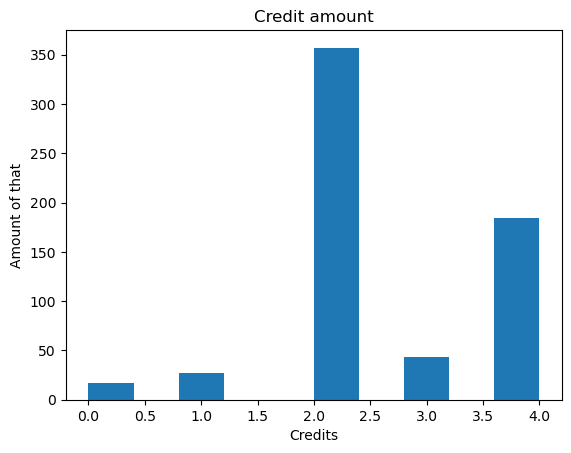

In [18]:
# here we plot the data using the imported libraries
# here different ways of visualization is used that are brought here:
#1
plt.hist(df['Credit history  '])
plt.title("Credit amount")
plt.xlabel('Credits')
plt.ylabel('Amount of that')
plt.show()

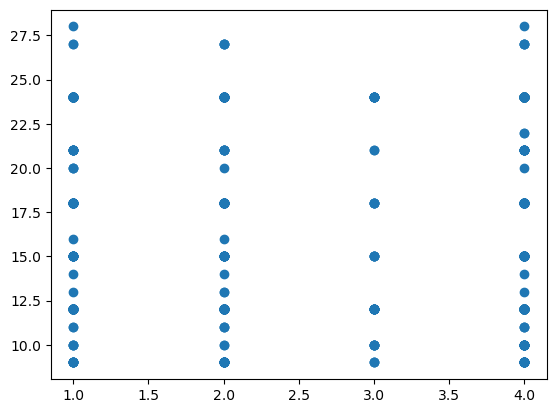

In [19]:
#2
plt.scatter(df['Status of existing checking account'],df['Duration in month'])
plt.show()

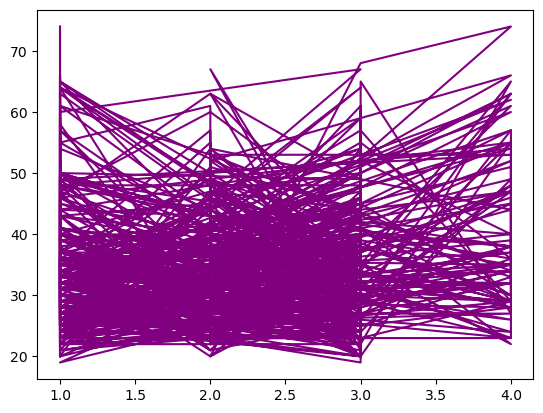

In [20]:
#3
plt.plot(df['Property '],df['Age in years '],c='purple')
plt.show()

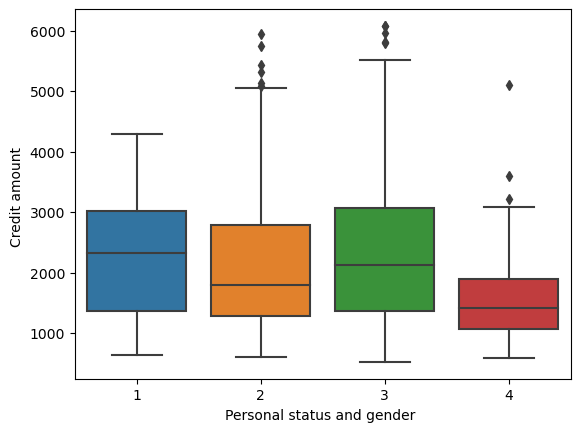

In [21]:
#4
import seaborn as sb
sb.boxplot(x='Personal status and gender ',y='Credit amount ',data=df)
plt.show()

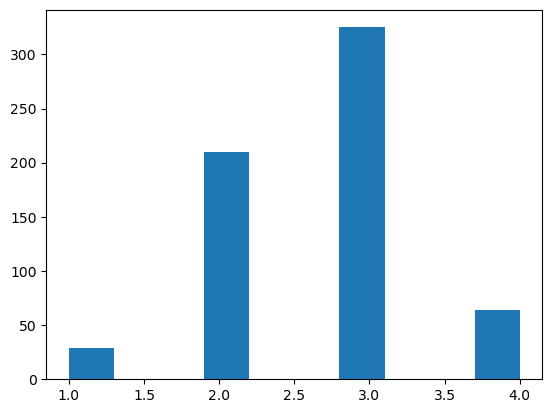

In [22]:
#5
plt.hist(df['Personal status and gender '])
plt.show()

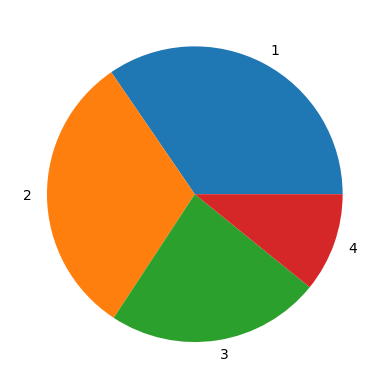

In [23]:
#6
list_property = list(df['Property '])
status_num = pd.Series(list_property)
status_num_count = status_num.value_counts()
plt.pie(status_num_count,labels=['1', '2', '3', '4'])
plt.show()

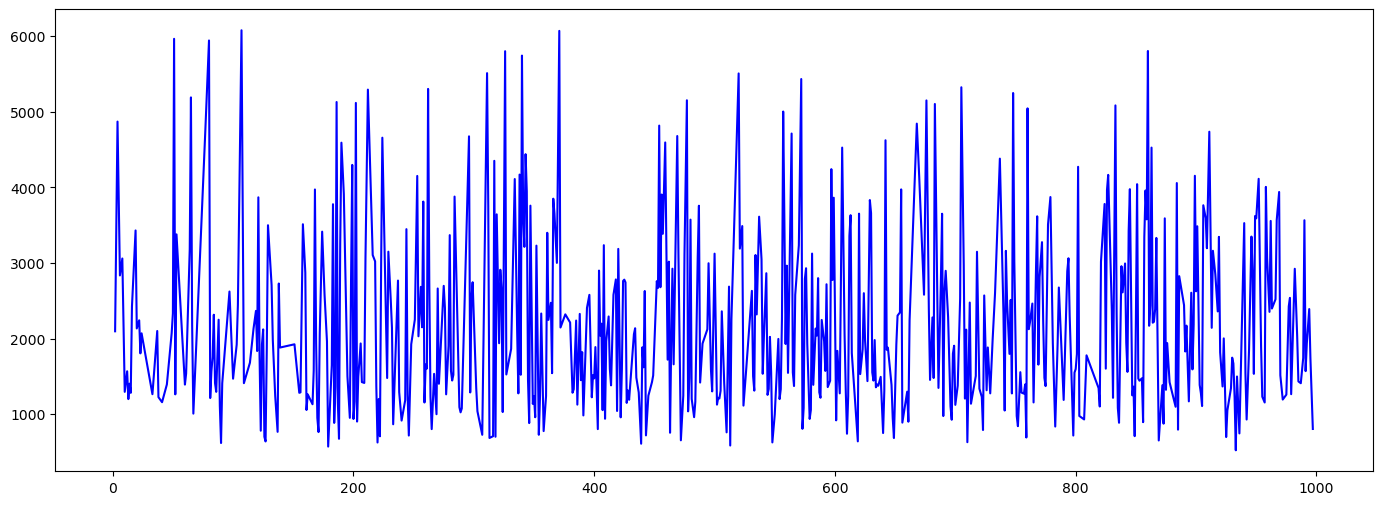

In [24]:
#7
plt.figure(figsize=(17,6),dpi=100)
plt.plot(df['Credit amount '],c='blue')
plt.show()

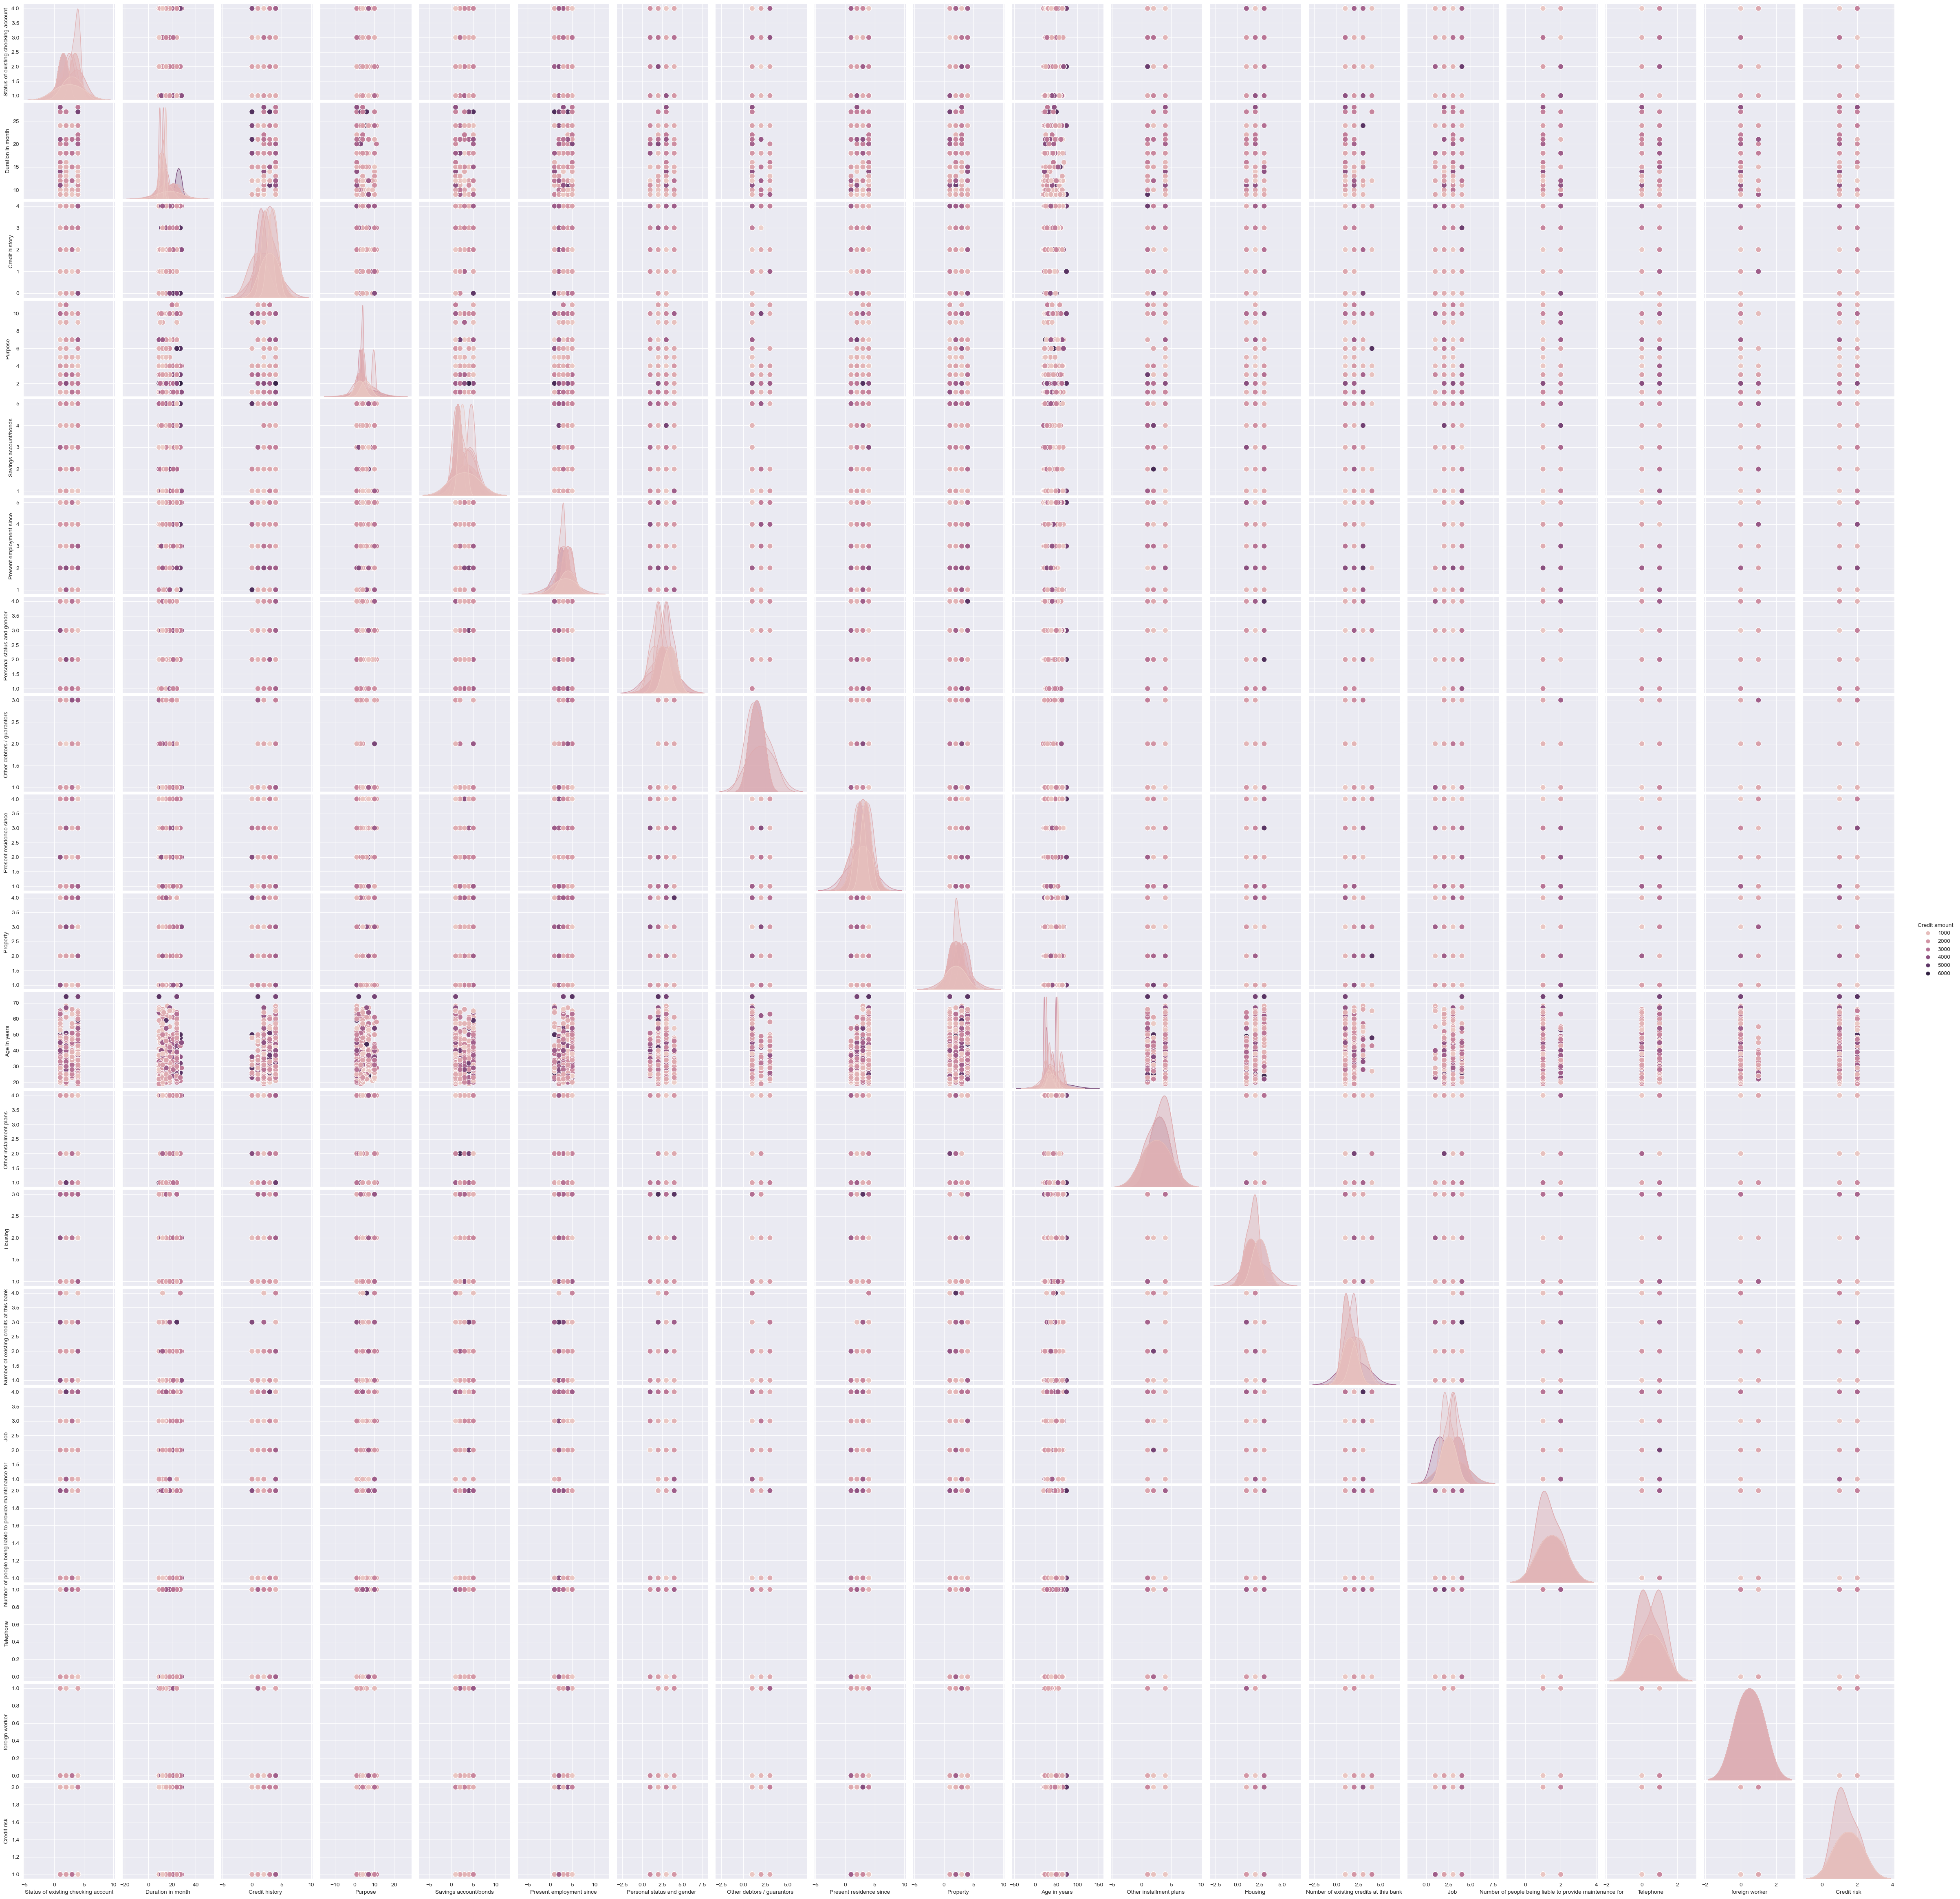

In [25]:
#8
sb.set_style('darkgrid')
sb.pairplot(df,hue='Credit amount ',plot_kws={'s':90})
plt.show()

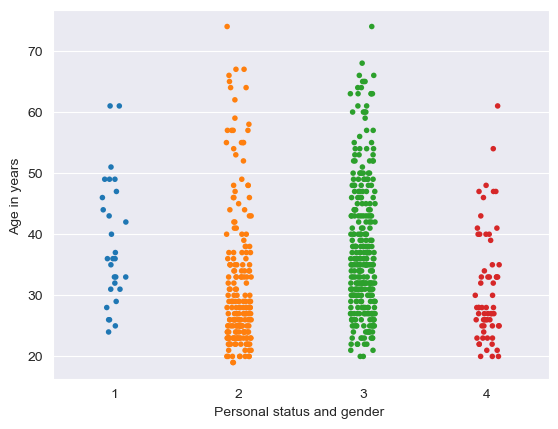

In [26]:
#9
sb.stripplot(x='Personal status and gender ',y='Age in years ',data=df,size=4)
plt.show()

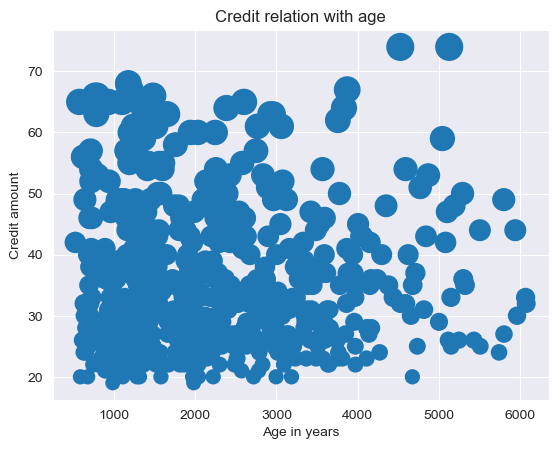

In [27]:
#10
popsize = np.array(df['Age in years '])*5
plt.scatter(df['Credit amount '],df['Age in years '],s=popsize)
plt.xlabel("Age in years")
plt.ylabel("Credit amount")
plt.title("Credit relation with age")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


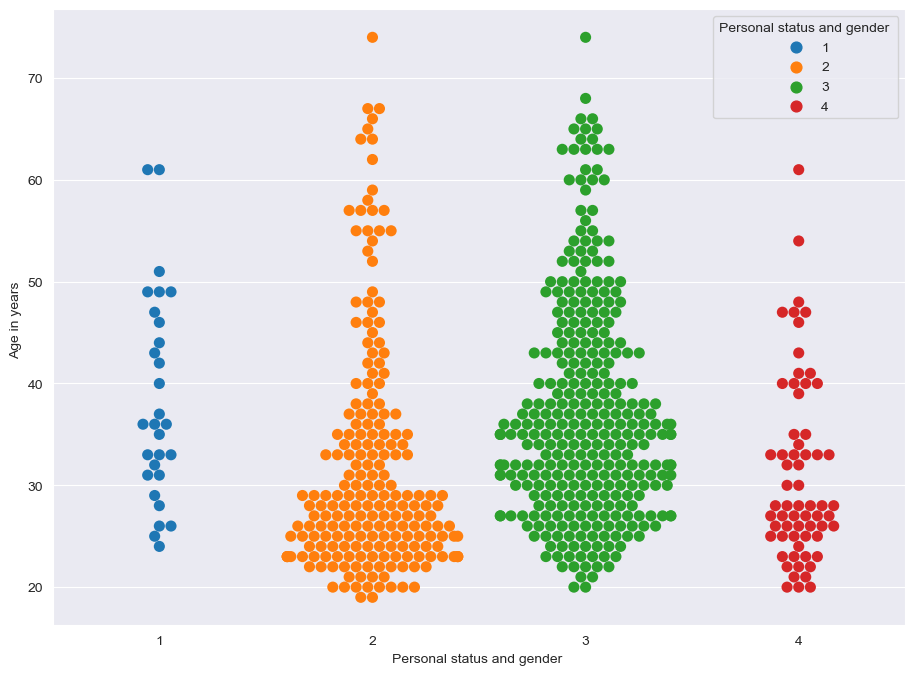

In [28]:
#11
plt.figure(figsize=(11,8))
sb.swarmplot(x='Personal status and gender ',y='Age in years ',data=df, hue='Personal status and gender ',size=8)
plt.show()

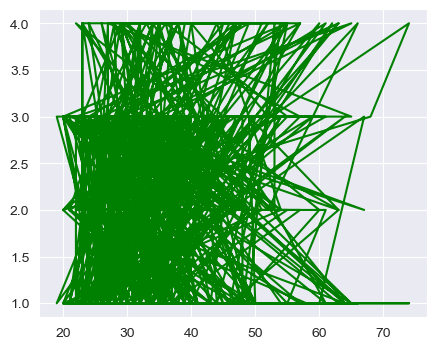

In [29]:
#11
plt.figure(figsize=(5,4) , dpi=100)
plt.plot(df['Age in years '], df['Property '], color = 'green')
plt.show()

In [30]:
df.info()
#there are no null values as we can see and the cleaning is complete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 997
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       628 non-null    int64  
 1   Duration in month                                         628 non-null    float64
 2   Credit history                                            628 non-null    int64  
 3   Purpose                                                   628 non-null    float64
 4   Credit amount                                             628 non-null    float64
 5   Savings account/bonds                                     628 non-null    int64  
 6   Present employment since                                  628 non-null    float64
 7   Installment rate in percentage of disposable income       628 non-null    object 
 8   Personal status and 

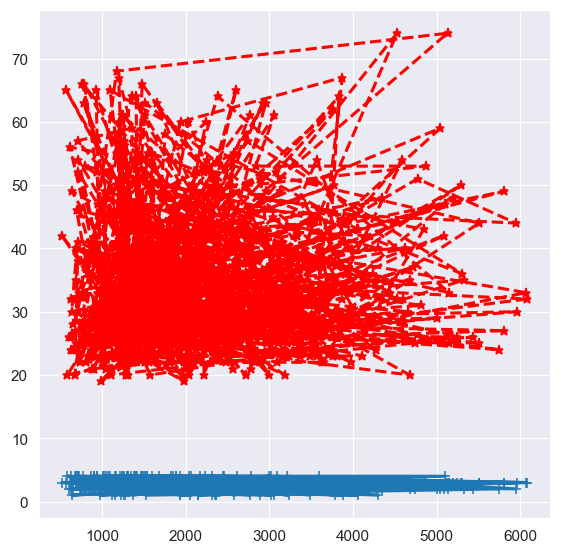

In [31]:
#12
plt.figure(figsize=(6,6),dpi=110)
plt.plot(df['Credit amount '],df['Personal status and gender '],ls='-',lw=2,marker='+')
plt.plot(df['Credit amount '],df['Age in years '],ls='--',lw=2,marker='*',color='red')
plt.show()

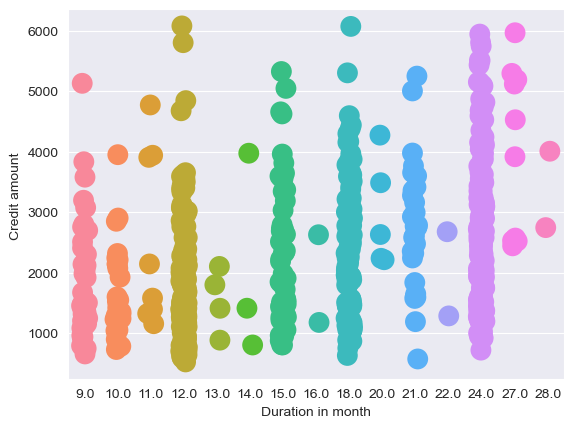

In [33]:
#13
sb.stripplot(x='Duration in month',y='Credit amount ',data=df,size=15)
plt.show()